<a href="https://colab.research.google.com/github/BielCandido/BielCandido/blob/main/NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudo de Tendências e Fatores de Seleção no Draft da NFL**

## **1. Introdução**

O Draft da National Football League (NFL) é um dos principais eventos do esporte nos Estados Unidos. Realizado anualmente, o processo tem como objetivo selecionar jogadores universitários para ingressar nas equipes da liga. A ordem das escolhas é definida de forma que o time com a pior campanha da temporada anterior tenha a primeira seleção, garantindo maior equilíbrio competitivo entre as franquias. Assim, rodada após rodada, as equipes escolhem novos atletas para reforçar seus elencos.

A análise dos dados do Draft permite compreender tendências relevantes, como as posições mais valorizadas, as universidades que mais formam jogadores selecionados e a relação de características físicas e demográficas com a escolha. Neste trabalho, o objetivo é explorar uma base de dados contendo informações de diversos Drafts da NFL para identificar padrões e fatores que podem influenciar o processo de seleção de jogadores.

# **1. Importação das bibliotecas**

In [2]:

import numpy as np # Biblioteca fundamental para operações numéricas em Python, como criação de arrays e matrizes.
import pandas as pd # Biblioteca para manipulação e análise de dados, utilizada para criar e manipular DataFrames.
import seaborn as sns # Biblioteca para visualização de dados, oferecendo uma interface de alto nível para criar gráficos estatísticos.
import networkx as nx # Biblioteca para criação e manipulação de grafos, útil para visualizar relações entre dados.
import matplotlib.cm as cm # Biblioteca para criação de mapas de cores personalizados.
import plotly.express as px # Biblioteca para criação de gráficos interativos, oferecendo uma ampla variedade de visualizações.
import matplotlib.pyplot as plt # Biblioteca para criação de gráficos estáticos, oferecendo um conjunto completo de ferramentas para visualização de dados.
import plotly.graph_objects as go # Biblioteca para criação de gráficos interativos complexos.
from itertools import combinations # Biblioteca para gerar todas as combinações possíveis de elementos em um iterável.
from sklearn.cluster import KMeans # Biblioteca para implementar o algoritmo de clustering K-means.
from sklearn.decomposition import PCA # Biblioteca para realizar Análise de Componentes Principais (PCA), uma técnica de redução de dimensionalidade.
from sklearn.metrics import silhouette_score # Biblioteca para calcular a métrica Silhouette, utilizada para avaliar a qualidade dos clusters.
from sklearn.metrics import silhouette_samples # Biblioteca para calcular os coeficientes de silhouette para cada amostra.
from sklearn.preprocessing import MinMaxScaler # Biblioteca para escalonar os dados, colocando todas as features em uma mesma escala.
print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/draft.xlsx'
df = pd.read_excel(caminho_arquivo)

# **2. Seleção das colunas de interesse**

In [5]:
import pandas as pd
import numpy as np

# --- ETAPA DE CARREGAMENTO DOS DADOS ---
# ADICIONE ESTA LINHA E AJUSTE O NOME DO ARQUIVO
# Substitua 'nome_do_seu_arquivo.csv' pelo nome real do seu arquivo de dados.

# --- Etapa 1: Selecionar as colunas de interesse ---
colunas_interesse = [
    'draftTeam',
    'college',
    'position',
    'heightInches',
    'weight',
    'ageAtDraft',
    'round' # Você tinha adicionado 'round' no passo anterior
]
df_analise = df[colunas_interesse].copy()

# --- Etapa 2: LIMPEZA E PREENCHIMENTO COM ZERO ---

# 2.1 - Converter colunas numéricas, transformando erros em NaN
colunas_numericas = ['heightInches', 'weight', 'ageAtDraft', 'round']
for col in colunas_numericas:
    df_analise[col] = pd.to_numeric(df_analise[col], errors='coerce')

# 2.2 - Preencher os nulos
valores_para_preencher = {
    'heightInches': 0, 'weight': 0, 'ageAtDraft': 0, 'round' : 0,
    'college': 'Desconhecido', 'position': 'Desconhecido', 'draftTeam': 'Desconhecido'
}
df_analise.fillna(value=valores_para_preencher, inplace=True)

# 2.3 - Garantir os tipos de dados corretos
df_analise['round'] = df_analise['round'].astype(int)
df_analise['heightInches'] = df_analise['heightInches'].astype(float)
df_analise['weight'] = df_analise['weight'].astype(float)
df_analise['ageAtDraft'] = df_analise['ageAtDraft'].astype(float)

# **3. Análise Descritiva**

In [31]:
# --- Etapa 3: Análise Descritiva Final ---

print("--- Informações Gerais do DataFrame Final ---")
df_analise.info()

--- Informações Gerais do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   draftTeam     12140 non-null  object 
 1   college       12140 non-null  object 
 2   position      12140 non-null  object 
 3   heightInches  12140 non-null  float64
 4   weight        12140 non-null  float64
 5   ageAtDraft    12140 non-null  float64
 6   round         12140 non-null  int64  
 7   Cluster       12140 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 711.5+ KB


## **3.1 Frequência para Tendências**

### 3.1.1 Posições mais draftadas

In [32]:
# Contar as posições mais draftadas
print("--- Posições mais frequentes no Draft (Top 10) ---")
display(df_analise['position'].value_counts().head(10))

--- Posições mais frequentes no Draft (Top 10) ---


,count
position,
LB,1549
DB,1489
WR,1481
RB,1219
DE,980
OT,873
DT,771
OG,766
TE,689


### 3.1.2 Faculdades que mais fornecem jogadores

In [33]:
# Contar as faculdades que mais forneceram jogadores
print("--- Faculdades com mais jogadores draftados (Top 10) ---")
display(df_analise['college'].value_counts().head(10))

--- Faculdades com mais jogadores draftados (Top 10) ---


,count
college,
USC,255
Miami (FL),246
Ohio State,238
Florida,223
Penn State,222
Notre Dame,220
Florida State,215
Nebraska,213
Alabama,213


### 3.1.3 Times que mais draftam jogares

In [34]:
# Contar os times que mais selecionaram jogadores
print("--- Times com mais seleções no Draft (Top 10) ---")
display(df_analise['draftTeam'].value_counts().head(10))

--- Times com mais seleções no Draft (Top 10) ---


,count
draftTeam,
CIN,460
PIT,453
NE,452
GB,439
DAL,436
BUF,423
MIA,420
NYJ,414
TB,406


## **3.2 Visualização das Relações**

--- Gerando Gráfico de Dispersão (Pairplot) ---


Text(0.5, 1.02, 'Relação entre Atributos Físicos por Posição (Amostra)')

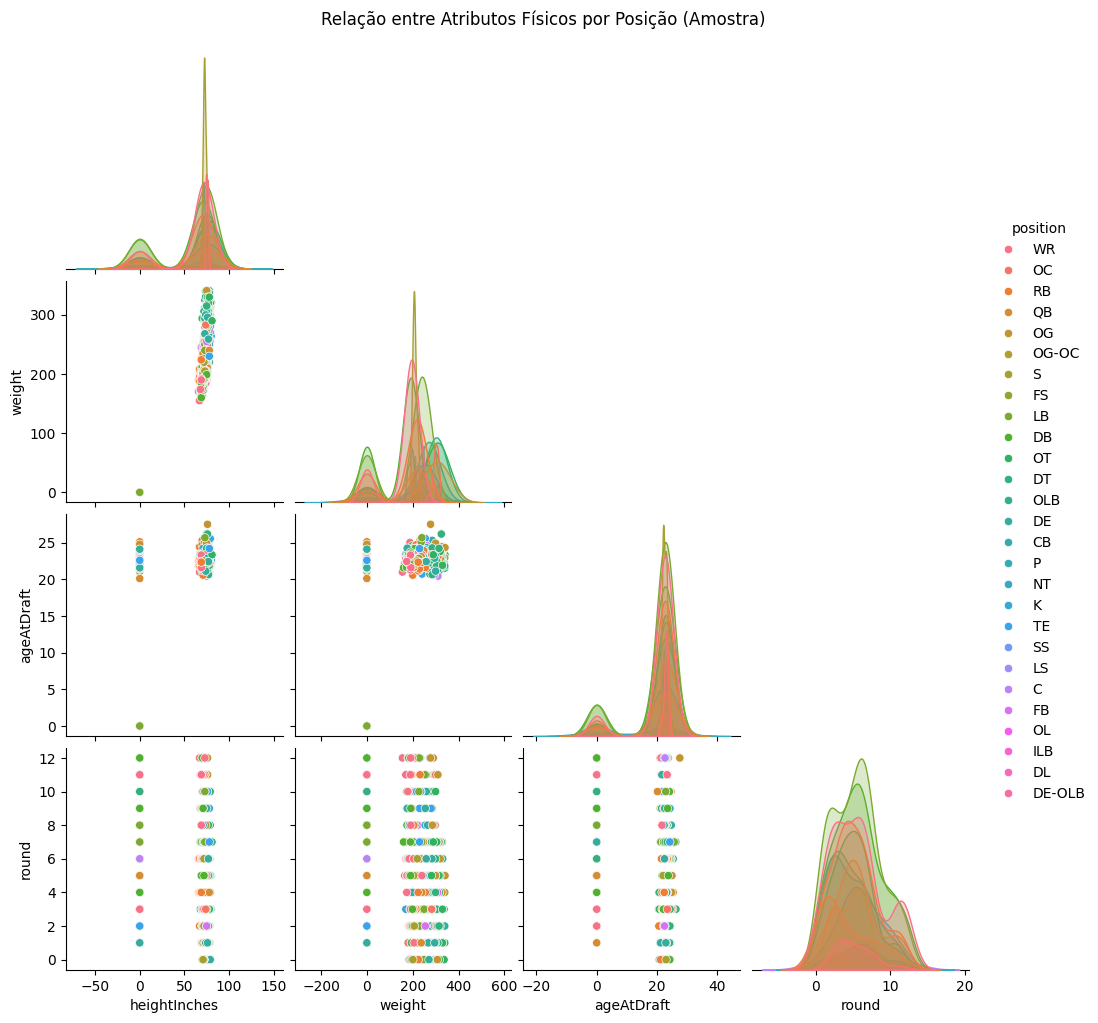

In [10]:
# --- Etapa 5: Visualização das Relações ---

print("--- Gerando Gráfico de Dispersão (Pairplot) ---")
# Criando um pairplot para visualizar a relação entre as variáveis numéricas,
# colorindo os pontos pela 'posição' do jogador.
# Usamos uma amostra de 1000 jogadores para o gráfico carregar mais rápido.
sns.pairplot(df_analise.sample(n=1000, random_state=1), hue='position', corner=True)
plt.suptitle('Relação entre Atributos Físicos por Posição (Amostra)', y=1.02)
# plt.show() # Em um notebook, o gráfico aparecerá. Se for um script .py, descomente esta linha.

### 3.2.1 Visualização

--- Gerando Gráfico de Posições por Rodada ---


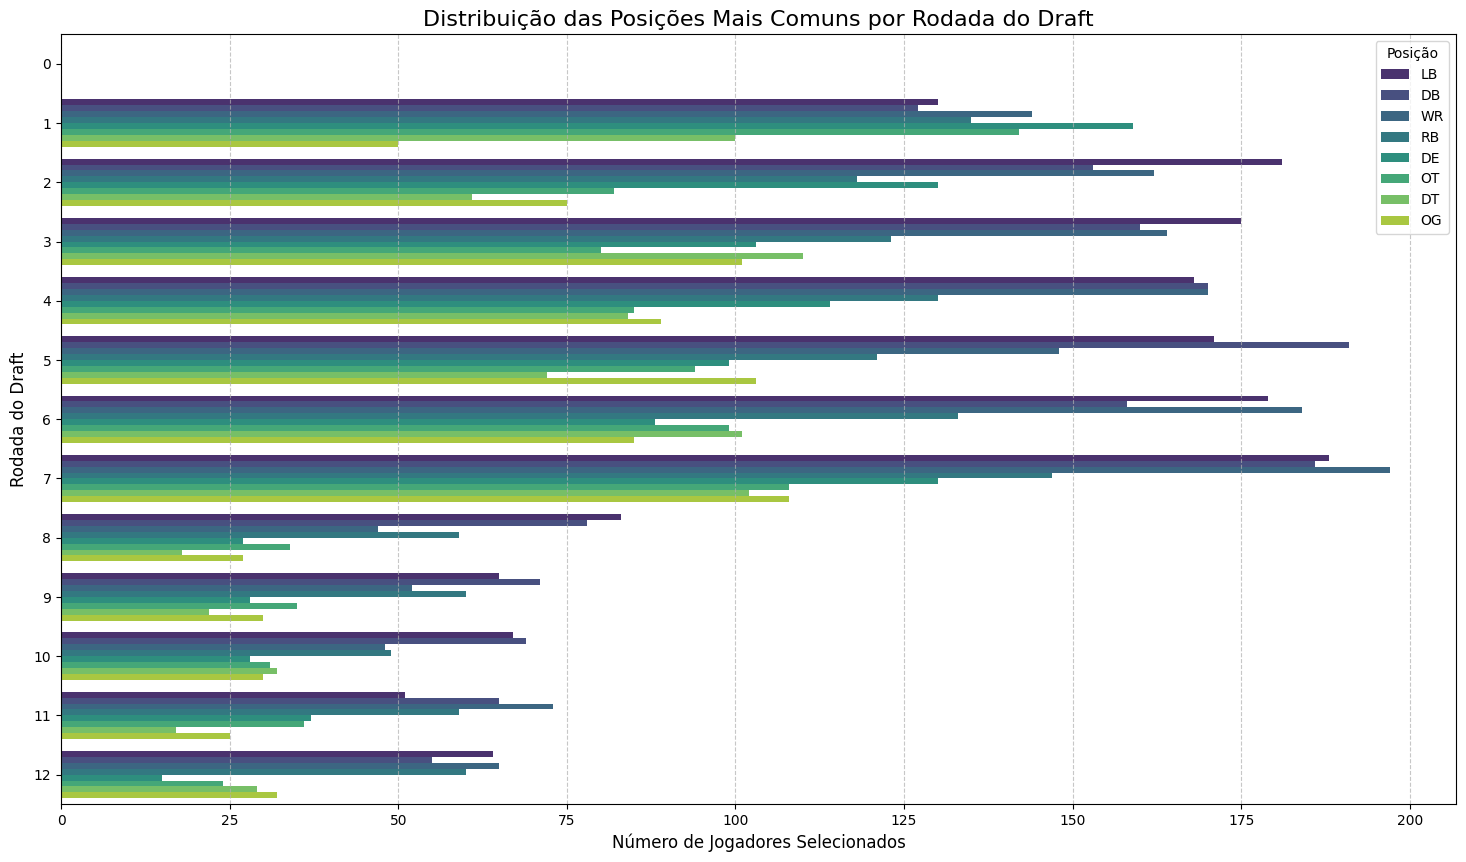



--- Gerando Gráficos de Boxplot de Atributos Físicos por Rodada ---


/tmp/ipython-input-1729360731.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analise[df_analise['heightInches'] > 0], x='round', y='heightInches', ax=axes[0], palette='plasma')
/tmp/ipython-input-1729360731.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analise[df_analise['weight'] > 0], x='round', y='weight', ax=axes[1], palette='magma')
/tmp/ipython-input-1729360731.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analise[df_analise['ageAtDraft'] > 0], x='round', y='ageAtDraft', ax=axes[2], palette='

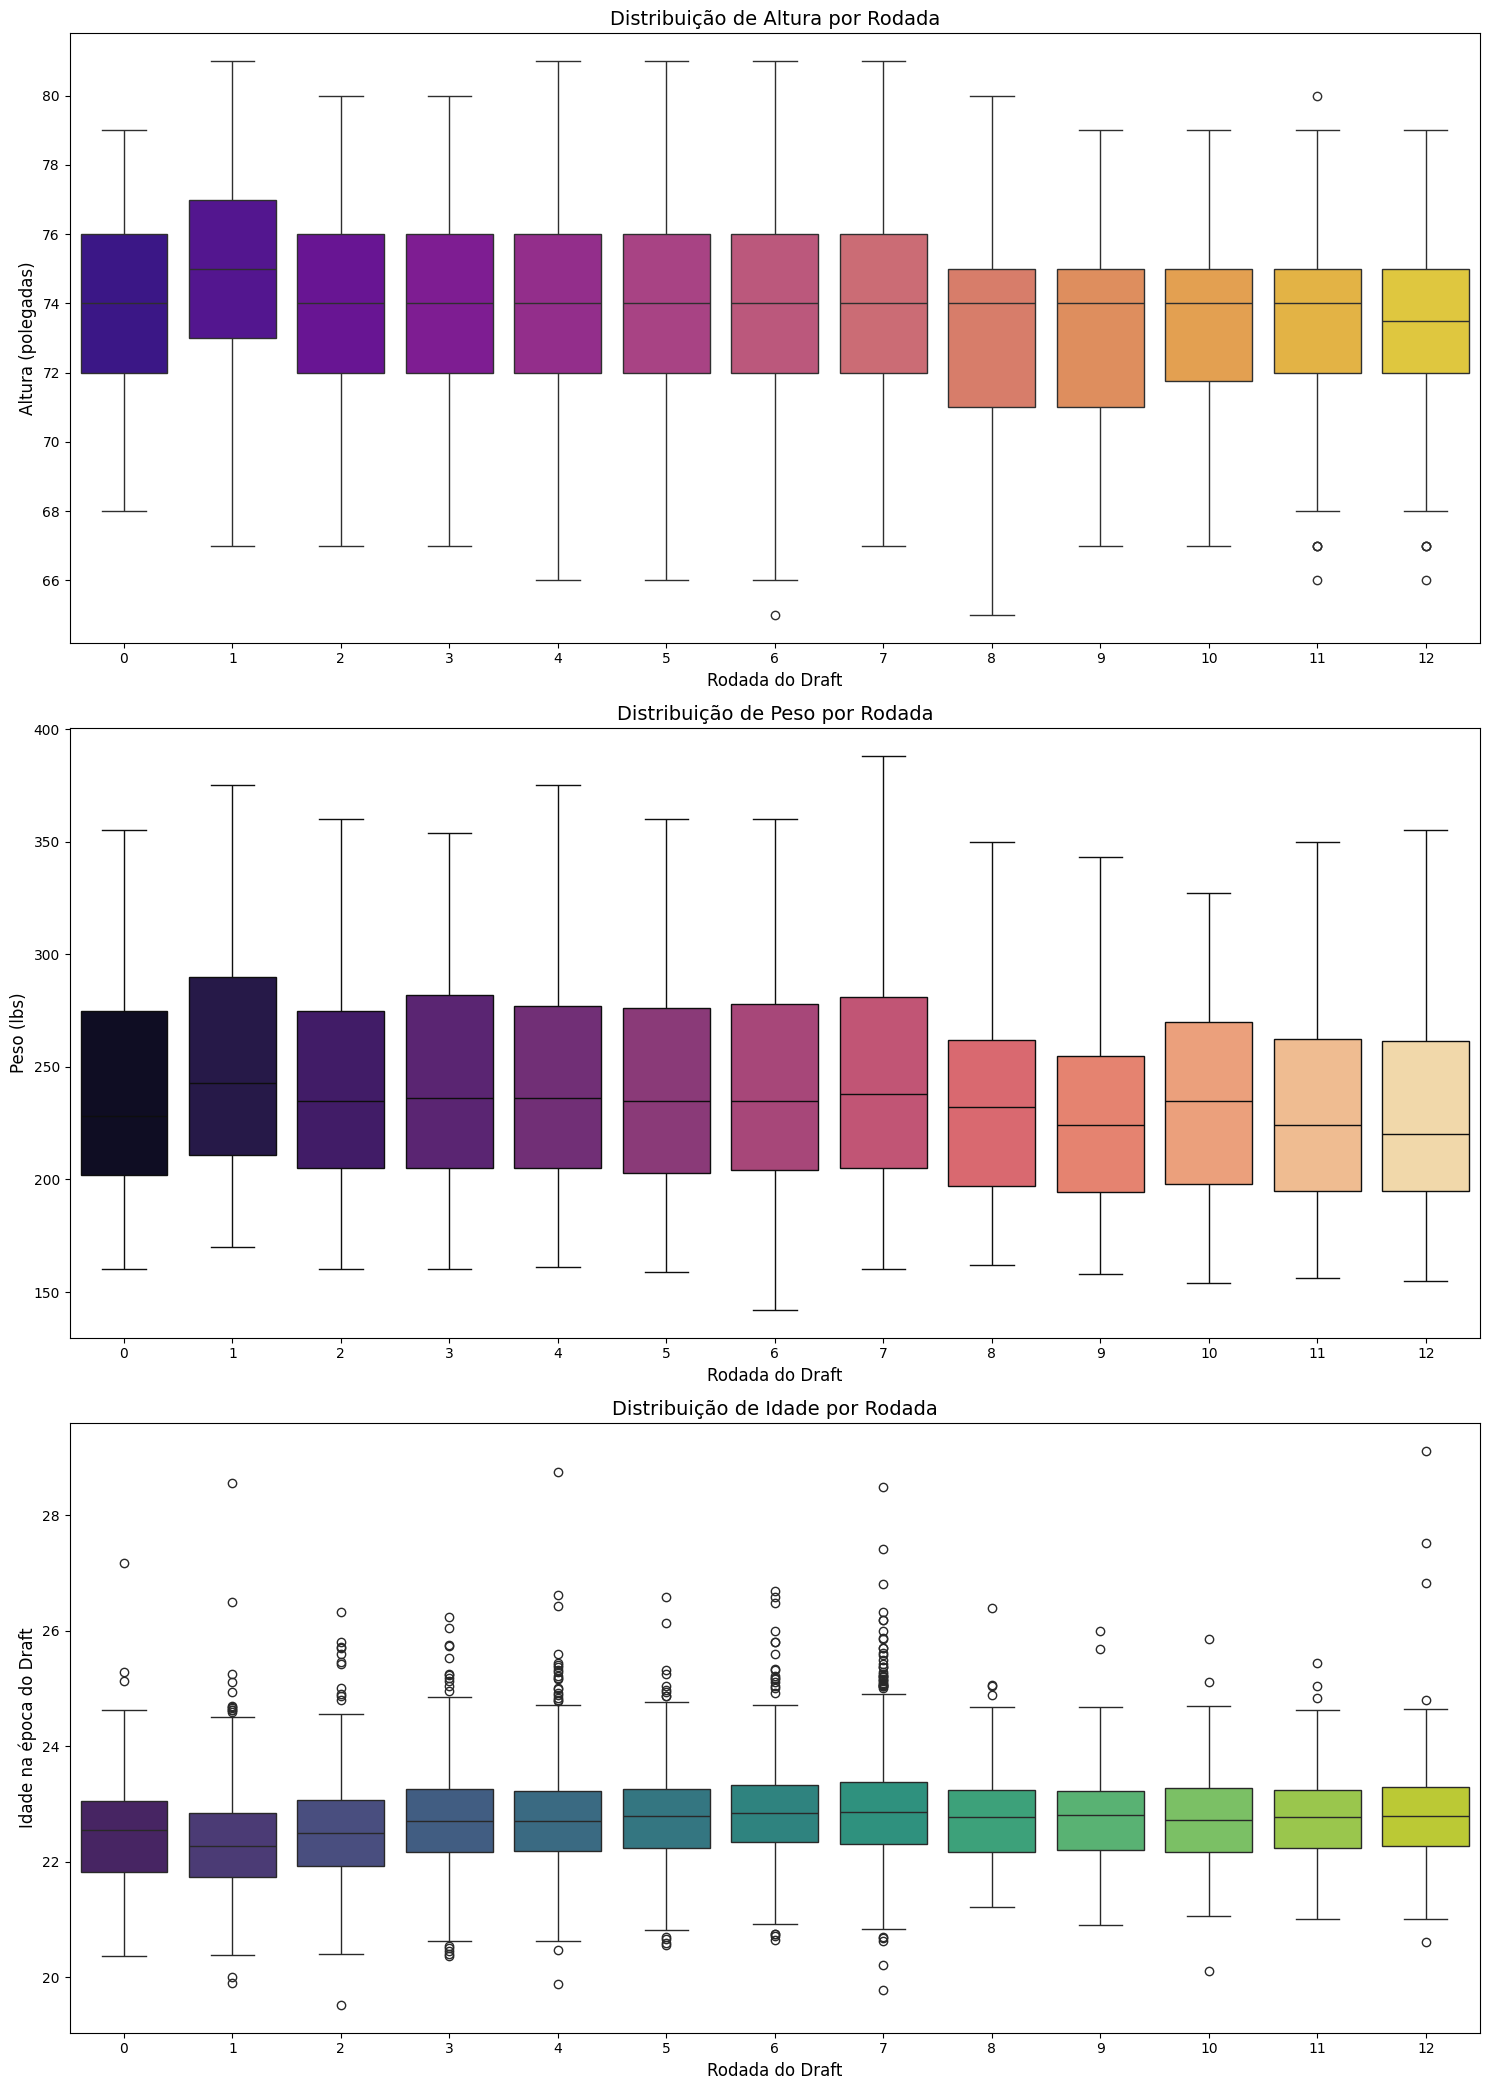

In [11]:
# --- Etapa 4: Visualização Gráfica ---

print("--- Gerando Gráfico de Posições por Rodada ---")
plt.figure(figsize=(18, 10))
sns.countplot(data=df_analise[df_analise['round'] > 0], y='round', hue='position',
              order=sorted(df_analise['round'].unique()),
              hue_order=df_analise['position'].value_counts().head(8).index,
              orient='h', palette='viridis')
plt.title('Distribuição das Posições Mais Comuns por Rodada do Draft', fontsize=16)
plt.xlabel('Número de Jogadores Selecionados', fontsize=12)
plt.ylabel('Rodada do Draft', fontsize=12)
plt.legend(title='Posição')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# --- Gerando Gráficos de Boxplot de Atributos Físicos por Rodada (Verticalmente) ---
print("\n" + "="*50 + "\n")
print("--- Gerando Gráficos de Boxplot de Atributos Físicos por Rodada ---")

# MUDANÇA AQUI: de (1, 3) para (3, 1) para criar 3 linhas e 1 coluna.
# Ajustamos também o figsize para um layout vertical mais agradável.
fig, axes = plt.subplots(3, 1, figsize=(15, 21))

# Boxplot para Altura (no primeiro subplot)
sns.boxplot(data=df_analise[df_analise['heightInches'] > 0], x='round', y='heightInches', ax=axes[0], palette='plasma')
axes[0].set_title('Distribuição de Altura por Rodada', fontsize=14)
axes[0].set_xlabel('Rodada do Draft', fontsize=12)
axes[0].set_ylabel('Altura (polegadas)', fontsize=12)

# Boxplot para Peso (no segundo subplot)
sns.boxplot(data=df_analise[df_analise['weight'] > 0], x='round', y='weight', ax=axes[1], palette='magma')
axes[1].set_title('Distribuição de Peso por Rodada', fontsize=14)
axes[1].set_xlabel('Rodada do Draft', fontsize=12)
axes[1].set_ylabel('Peso (lbs)', fontsize=12)

# Boxplot para Idade (no terceiro subplot)
sns.boxplot(data=df_analise[df_analise['ageAtDraft'] > 0], x='round', y='ageAtDraft', ax=axes[2], palette='viridis')
axes[2].set_title('Distribuição de Idade por Rodada', fontsize=14)
axes[2].set_xlabel('Rodada do Draft', fontsize=12)
axes[2].set_ylabel('Idade na época do Draft', fontsize=12)

plt.tight_layout()
plt.show()

# **4. Agrupamento (Clustering)**

## Análise de Componentes Principais - PCA

A Análise de Componentes Principais (PCA, do inglês Principal Component Analysis) é uma técnica estatística de redução de dimensionalidade. Seu objetivo é simplificar conjuntos de dados que possuem muitas variáveis, transformando-as em um número menor de componentes principais sem perder informações relevantes.

## 4.1 Aplicação do PCA

--- Análise da Variação dos Componentes Principais ---
    Componente  Variação Explicada  Variação Acumulada
0            1            0.057366            0.057366
1            2            0.024006            0.081372
2            3            0.023730            0.105103
3            4            0.023512            0.128615
4            5            0.023182            0.151797
5            6            0.022679            0.174476
6            7            0.022450            0.196926
7            8            0.022225            0.219151
8            9            0.022187            0.241339
9           10            0.021958            0.263297
10          11            0.021657            0.284954
11          12            0.021470            0.306425
12          13            0.021258            0.327682
13          14            0.021099            0.348781
14          15            0.021072            0.369853
15          16            0.021061            0.390914
16        

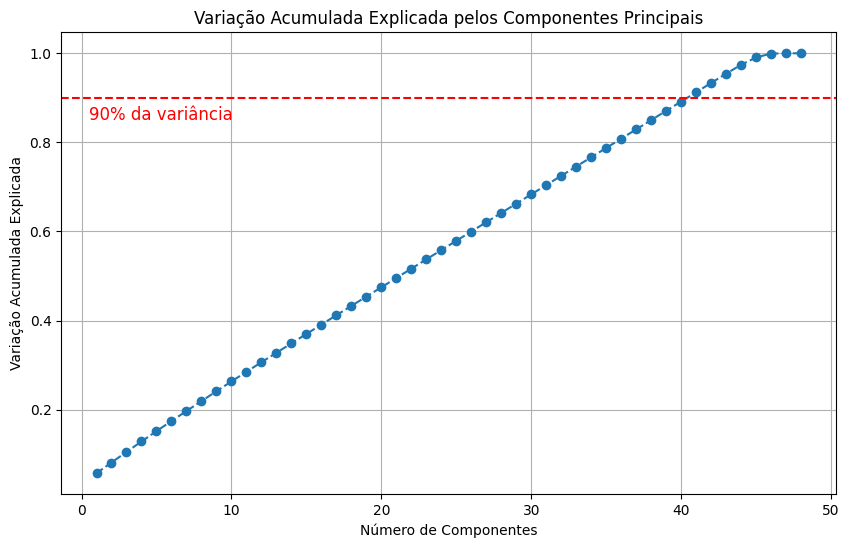

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# --- Etapa 1: Preparação dos Dados para o PCA ---

# Vamos usar o DataFrame 'df_analise' que preparamos anteriormente
# Selecionamos apenas os atributos que definem o perfil de um jogador
# (Excluímos 'draftTeam' e 'college' por enquanto, pois são categorias com muitas variações)
colunas_pca = ['position', 'heightInches', 'weight', 'ageAtDraft', 'round']
df_pca_source = df_analise[colunas_pca].copy()

# 1.1 - One-Hot Encoding para a coluna 'position'
# Isso cria uma nova coluna para cada posição (ex: position_QB, position_WR) com valores 0 ou 1
df_pca_encoded = pd.get_dummies(df_pca_source, columns=['position'], drop_first=True)

# 1.2 - Padronização dos Dados (Scaling)
# O PCA é sensível à escala das variáveis, então padronizamos todas para terem média 0 e desvio padrão 1.
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(df_pca_encoded)


# --- Etapa 2: Aplicação do PCA ---

# Instanciamos o PCA. Não definimos o número de componentes ainda para analisar todos.
pca = PCA()
componentes_principais = pca.fit_transform(dados_scaled)


# --- Etapa 3: Análise da Variância Explicada ---

# Variação explicada por cada componente individualmente
variancia_explicada = pca.explained_variance_ratio_

# Variação explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)

# Criando um DataFrame para visualizar os resultados
df_variancia = pd.DataFrame({
    "Componente": range(1, len(variancia_explicada) + 1),
    "Variação Explicada": variancia_explicada,
    "Variação Acumulada": variancia_acumulada
})

print("--- Análise da Variação dos Componentes Principais ---")
print(df_variancia)


# --- Etapa 4: Visualização da Variação Acumulada (Gráfico de Cotovelo) ---

plt.figure(figsize=(10, 6))
plt.plot(df_variancia["Componente"], df_variancia["Variação Acumulada"], marker='o', linestyle='--')
plt.title('Variação Acumulada Explicada pelos Componentes Principais')
plt.xlabel('Número de Componentes')
plt.ylabel('Variação Acumulada Explicada')
plt.grid(True)
# Linha para marcar 90% da variância, um limiar comum
plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(0.5, 0.85, '90% da variância', color = 'red', fontsize=12)
plt.show()


### 4.1.1 Dataframe Final para o agrupamento

In [13]:
from sklearn.decomposition import PCA
import pandas as pd

# Supondo que a variável 'dados_scaled' do passo anterior ainda está na memória

# Definimos o número de componentes que decidimos usar com base na nova tabela
n_componentes_final = 41

# Aplicamos o PCA novamente, especificando o número de componentes
pca_final = PCA(n_components=n_componentes_final)
componentes_principais_final = pca_final.fit_transform(dados_scaled)

# Criamos o DataFrame final que será usado para a clusterização
df_para_cluster = pd.DataFrame(data=componentes_principais_final,
                               columns=[f'Componente_{i}' for i in range(1, n_componentes_final + 1)])

print("DataFrame criado com sucesso para a etapa de clusterização!")
print(f"Shape (formato) do novo DataFrame: {df_para_cluster.shape}")
display(df_para_cluster.head())

DataFrame criado com sucesso para a etapa de clusterização!
Shape (formato) do novo DataFrame: (12140, 41)


,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,...,Componente_32,Componente_33,Componente_34,Componente_35,Componente_36,Componente_37,Componente_38,Componente_39,Componente_40,Componente_41
0,0.679158,0.050876,0.131810,-1.461128,2.416086,-1.123488,0.072935,0.169241,-0.379083,-0.543370,...,0.004877,-0.002030,9.675908e-13,2.214779e-13,4.110818e-13,8.367385e-13,-1.669823e-13,-4.650759e-13,5.670438e-13,1.140678e-12
1,0.541121,0.084919,0.123951,-1.433274,2.444452,-1.135333,0.071183,0.159081,-0.374975,-0.536521,...,0.005033,-0.002021,9.466648e-13,2.069400e-13,3.983801e-13,8.402739e-13,-1.561247e-13,-4.751616e-13,5.622074e-13,1.139859e-12
2,1.499406,0.117762,0.342879,-0.096667,1.221669,3.155924,-0.802296,0.365052,0.095709,-0.242678,...,0.002853,-0.001433,4.058338e-13,3.530129e-14,2.180739e-13,5.137278e-13,9.236096e-15,-3.314033e-13,3.387574e-13,6.133953e-13
3,1.455584,-0.462299,0.386315,-0.791773,-0.532833,0.682406,3.430553,-0.083400,0.052454,-0.085823,...,0.002025,-0.002056,2.675993e-13,-5.795874e-14,1.474281e-13,5.588718e-13,9.494878e-14,-4.344146e-13,3.329446e-13,6.505470e-13
4,1.446778,0.103926,0.345221,-0.109050,1.216407,3.170161,-0.797760,0.370976,0.093569,-0.240524,...,0.002742,-0.001417,4.050133e-13,3.944858e-14,2.203559e-13,5.045364e-13,6.753707e-15,-3.233455e-13,3.359220e-13,6.032559e-13


## **4.2 Análise Gráfica de Variação Explicada**

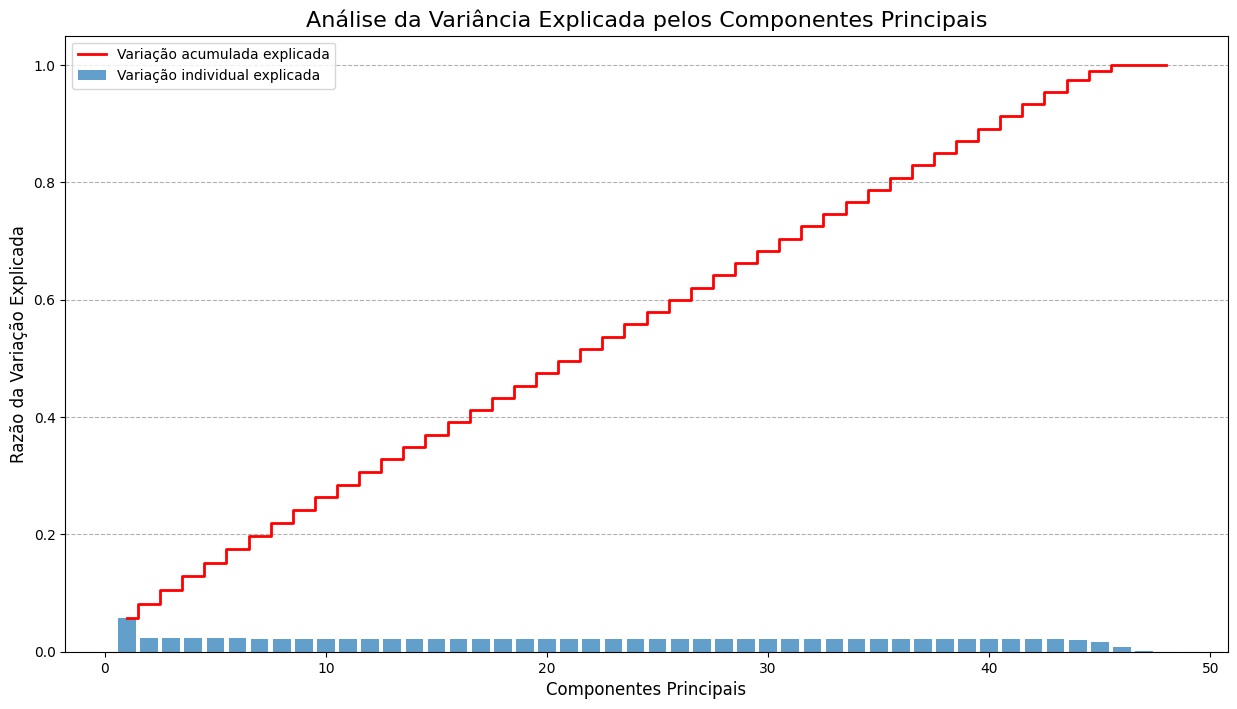

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que as variáveis 'variancia_explicada' e 'variancia_acumulada'
# do passo anterior (cálculo do PCA) ainda estão na memória.

# Criando o gráfico com um tamanho maior para melhor visualização
plt.figure(figsize=(15, 8))

# Gráfico de barras para a variância individual explicada
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, align='center',
        label='Variação individual explicada')

# Gráfico de linha (degraus) para a variância acumulada
plt.step(range(1, len(variancia_acumulada) + 1), variancia_acumulada, where='mid',
         label='Variação acumulada explicada', color='red', linewidth=2)

plt.ylabel('Razão da Variação Explicada', fontsize=12)
plt.xlabel('Componentes Principais', fontsize=12)
plt.title('Análise da Variância Explicada pelos Componentes Principais', fontsize=16)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')
plt.show()

## **4.3 Número ideal de Clursters - Elbow Method**

O objetivo aqui é descobrir quantos "grupos" ou "perfis" de jogadores existem naturalmente nos seus dados. Faremos isso testando diferentes números de clusters (de 1 a 15, por exemplo) e medindo o quão bem os jogadores ficam agrupados em cada cenário.

### 4.3.1 Aplicação Método do Cotovelo (Elbow Method)

Calculando o WCSS para cada número de clusters (de 1 a 15)...
Cálculo finalizado.


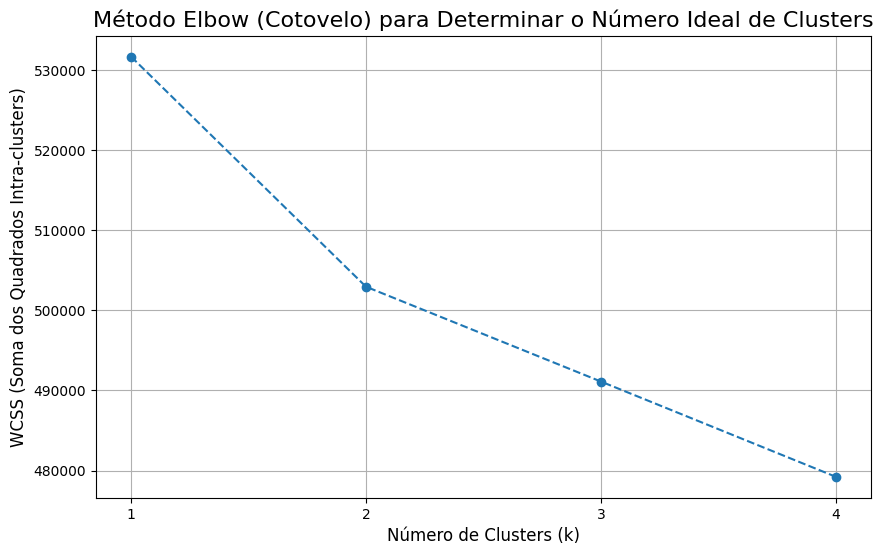

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supondo que o DataFrame 'df_para_cluster' da etapa do PCA ainda está na memória.

# Lista para armazenar o WCSS (Within-Cluster Sum of Squares) para cada número de clusters
wcss = []
max_clusters = 4

print("Calculando o WCSS para cada número de clusters (de 1 a 15)...")

for i in range(1, max_clusters + 1):
    # Cria e treina o modelo KMeans com 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_para_cluster)
    # Adiciona o valor do WCSS (inertia_) à lista
    wcss.append(kmeans.inertia_)

print("Cálculo finalizado.")


# --- Visualização Gráfica do Método Elbow ---

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Método Elbow (Cotovelo) para Determinar o Número Ideal de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Soma dos Quadrados Intra-clusters)', fontsize=12)
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

## **4.4 Algoritmo K-Means**

Nesta etapa, o objetivo é aplicar o algoritmo de agrupamento K-Means aos dados transformados pela Análise de Componentes Principais (PCA). A meta é identificar grupos de jogadores com perfis semelhantes com base em seus atributos físicos, de posição e desempenho no draft.

O que é o K-Means?
O K-Means é um dos algoritmos de aprendizado de máquina não supervisionado mais populares, utilizado para clusterização. Seu principal objetivo é particionar um conjunto de dados em K clusters (grupos) distintos e não sobrepostos.

A lógica do algoritmo é agrupar os pontos de dados de forma que a variação dentro de cada cluster seja a menor possível. Em outras palavras, ele tenta criar grupos onde os membros são muito parecidos entre si, mas bem diferentes dos membros de outros grupos. A "similaridade" entre os pontos de dados é medida pela distância entre eles, geralmente a distância euclidiana.

### 4.4.1 Aplicação do Algoritmo K-Means

In [16]:
from sklearn.cluster import KMeans
import pandas as pd

# Supondo que o DataFrame 'df_para_cluster' (do PCA) e o 'df_analise' ainda estão na memória.

# Definimos o número de clusters que encontramos no Método Elbow
n_clusters_final = 4
# Cria e treina o modelo K-Means com 4 clusters
# init='k-means++' : ajuda a inicializar os centróides de forma mais inteligente
# n_init=10 : executa o algoritmo 10 vezes com diferentes centróides e escolhe o melhor resultado
# random_state=42 : garante que os resultados sejam os mesmos toda vez que você rodar o código
kmeans = KMeans(n_clusters=n_clusters_final, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_para_cluster)

# Adiciona a nova coluna 'Cluster' ao seu DataFrame de análise principal
df_analise['Cluster'] = clusters

# --- Resultados do Agrupamento ---

print(f"--- Jogadores agrupados em {n_clusters_final} clusters ---")

# Mostra a contagem de jogadores em cada cluster
print("\nContagem de jogadores por cluster:")
print(df_analise['Cluster'].value_counts())

# Mostra as primeiras linhas do DataFrame com a nova coluna 'Cluster'
print("\nExemplo do DataFrame com a coluna 'Cluster':")
display(df_analise.head())

--- Jogadores agrupados em 4 clusters ---

Contagem de jogadores por cluster:
Cluster
2    9468
1    2544
0     126
3       2
Name: count, dtype: int64

Exemplo do DataFrame com a coluna 'Cluster':


,draftTeam,college,position,heightInches,weight,ageAtDraft,round,Cluster
0,TB,USC,RB,74.0,220.0,22.084932,1,2
1,DAL,Pittsburgh,RB,71.0,192.0,23.087671,1,2
2,CIN,Miami (FL),DE,77.0,256.0,23.038356,1,2
3,NYJ,USC,OT,77.0,268.0,21.690411,1,2
4,NYG,USC,DE,76.0,259.0,22.287671,1,2


## **4.5 Análise da Silhueta (Silhouette Analysis)**

Vamos validar a qualidade do nosso agrupamento. Enquanto o Método Elbow nos ajudou a escolher o número de clusters, a Análise de Silhueta nos diz o quão bons esses 4 clusters realmente são. Ela mede se os jogadores estão bem agrupados com seus pares (coesão) e bem separados dos outros grupos (separação).

### 4.5.1 Aplicação da Silhouette Analysis - Score

Nesta primeira etapa, vamos calcular uma única métrica geral, o Score Médio de Silhueta, para avaliar a qualidade do nosso agrupamento de 4 clusters. Este score varia de -1 a 1, e quanto mais próximo de 1, melhor a definição e separação dos seus clusters.

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Supondo que 'df_para_cluster' (do PCA) e 'clusters' (do K-Means) ainda estão na memória.

# O silhouette_score calcula a média do valor para todas as amostras.
silhouette_avg = silhouette_score(df_para_cluster, clusters)

# Calcula o coeficiente de silhueta para cada amostra
sample_silhouette_values = silhouette_samples(df_para_cluster, clusters)

print(f"O score médio de silhueta para {n_clusters_final} clusters é: {silhouette_avg:.4f}")

O score médio de silhueta para 4 clusters é: 0.1391


### 4.5.2 Aplicação da Silhouette Analysis - Samples

Agora, em vez de um score médio para todo o dataset, vamos calcular um score de silhueta individual para cada jogador. Isso nos permitirá analisar o quão bem cada ponto de dado se encaixa em seu próprio cluster. Esses valores serão a base para a visualização gráfica na próxima etapa.

In [18]:
import pandas as pd

# Supondo que as variáveis 'clusters' e 'sample_silhouette_values'
# dos passos anteriores ainda estão na memória.

# Criando um DataFrame com os valores de Silhueta e os rótulos de cluster
df_silhouette_samples = pd.DataFrame({
    'Cluster': clusters,
    'Valor_Silhueta': sample_silhouette_values
})


# --- Resultados em Formato de Tabela ---

print("--- Tabela de Scores de Silhueta por Amostra (10 primeiros jogadores) ---")
display(df_silhouette_samples.head(10))

print("\n" + "="*50 + "\n")

# BÔNUS: Média do score de silhueta para cada cluster
print("--- Média do Valor de Silhueta por Cluster ---")
# Isso nos ajuda a ver quais clusters são mais coesos
print(df_silhouette_samples.groupby('Cluster')['Valor_Silhueta'].mean())

--- Tabela de Scores de Silhueta por Amostra (10 primeiros jogadores) ---


,Cluster,Valor_Silhueta
0,2,0.100005
1,2,0.086944
2,2,0.144687
3,2,0.128537
4,2,0.140765
5,2,0.130693
6,2,0.140155
7,2,0.143543
8,2,0.148017
9,2,0.088906




--- Média do Valor de Silhueta por Cluster ---
Cluster
0    0.835785
1    0.285091
2    0.090417
3    0.969777
Name: Valor_Silhueta, dtype: float64


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Supondo que 'df_draft' é o seu DataFrame original carregado do arquivo

# --- Etapa 1: Selecionar colunas ---
colunas_interesse = ['position', 'heightInches', 'weight', 'ageAtDraft', 'round']
df_limpeza = df_analise[colunas_interesse].copy()

# --- Etapa 2: LIMPEZA AVANÇADA E DEFINITIVA ---

# 2.1 - Converter para numérico e substituir os zeros por Nulos (NaN)
# Isso garante que tanto os nulos originais quanto os zeros sejam tratados como dados faltantes.
colunas_para_limpar_zeros = ['heightInches', 'weight', 'ageAtDraft', 'round']
for col in colunas_para_limpar_zeros:
    # Converte para numérico, transformando erros em NaN
    df_limpeza[col] = pd.to_numeric(df_limpeza[col], errors='coerce')
    # Substitui os zeros por NaN, pois não são valores válidos para estes atributos
    df_limpeza[col].replace(0, np.nan, inplace=True)

# 2.2 - Agora, REMOVER todas as linhas que contêm qualquer valor nulo
df_completo = df_limpeza.dropna()

print(f"Número de jogadores com dados completos após a limpeza final: {len(df_completo)}")
print("\n" + "="*50 + "\n")


# --- Etapa 3: Preparar os dados limpos para o PCA ---
df_pca_encoded = pd.get_dummies(df_completo, columns=['position'], drop_first=True)
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(df_pca_encoded)


# --- Etapa 4: PCA e K-Means nos dados limpos ---
# Você pode ajustar o n_components se quiser, mas 17 é um bom começo
pca = PCA(n_components=17)
df_para_cluster = pca.fit_transform(dados_scaled)

n_clusters_final = 4
kmeans = KMeans(n_clusters=n_clusters_final, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_para_cluster)

df_completo['Cluster'] = clusters


# --- Etapa 5: Análise dos NOVOS e CORRIGIDOS Clusters ---
print("\n--- Contagem de jogadores nos novos clusters ---")
print(df_completo['Cluster'].value_counts())

print("\n--- Perfil médio dos novos clusters ---")
cluster_means_numeric = df_completo.groupby('Cluster').mean(numeric_only=True)
cluster_mode_position = df_completo.groupby('Cluster')['position'].agg(lambda x: x.mode()[0]).to_frame()
df_perfis_clusters_final = pd.concat([cluster_means_numeric, cluster_mode_position], axis=1)

display(df_perfis_clusters_final)

Número de jogadores com dados completos após a limpeza final: 9293



--- Contagem de jogadores nos novos clusters ---
Cluster
0    3858
1    2973
3    1933
2     529
Name: count, dtype: int64

--- Perfil médio dos novos clusters ---


/tmp/ipython-input-3038019571.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpeza[col].replace(0, np.nan, inplace=True)
/tmp/ipython-input-3038019571.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['Cluster'] = clusters


,heightInches,weight,ageAtDraft,round,position
Cluster,,,,,
0,71.768792,201.279938,22.609828,4.823224,WR
1,76.117390,295.813993,22.823190,4.591995,DE
2,76.107750,252.359168,22.836600,5.143667,TE
3,74.098810,236.568546,22.767149,4.818934,LB


### 4.5.3 Análise Gráfica - Silhouette

Nesta etapa final, usamos os scores individuais calculados acima para construir o Gráfico de Silhueta. Esta visualização nos permite inspecionar a qualidade de cada cluster de forma individual, observando seu tamanho, formato e quão bem seus membros estão agrupados.

O score médio de silhueta para 4 clusters é: 0.2375


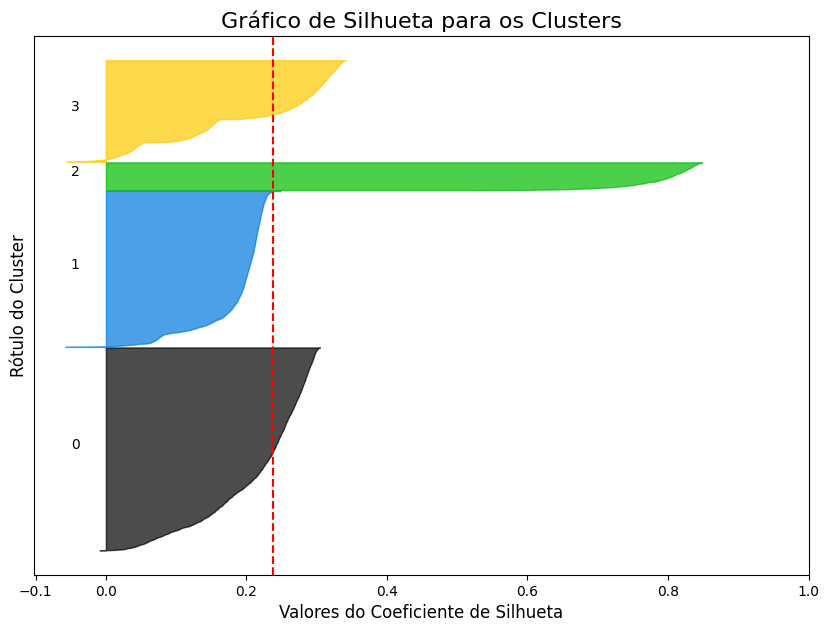

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'df_para_cluster' e 'clusters' foram gerados a partir do DataFrame limpo de 9293 jogadores.

# --- RECALCULAR OS VALORES DE SILHUETA COM OS DADOS CORRETOS ---
# Calcula o score médio e os scores individuais usando o mesmo 'df_para_cluster'
# que foi usado para treinar o K-Means
silhouette_avg = silhouette_score(df_para_cluster, clusters)
sample_silhouette_values = silhouette_samples(df_para_cluster, clusters)

print(f"O score médio de silhueta para {n_clusters_final} clusters é: {silhouette_avg:.4f}")

# --- Geração do Gráfico de Silhueta ---
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))
y_lower = 10

for i in range(n_clusters_final):
    # Agrega os scores de silhueta para as amostras de cada cluster e os ordena
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Define a cor para o cluster
    color = cm.nipy_spectral(float(i) / n_clusters_final)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Adiciona o número do cluster no meio da "faca"
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Atualiza o y_lower para o próximo cluster
    y_lower = y_upper + 10

ax1.set_title("Gráfico de Silhueta para os Clusters", fontsize=16)
ax1.set_xlabel("Valores do Coeficiente de Silhueta", fontsize=12)
ax1.set_ylabel("Rótulo do Cluster", fontsize=12)

# Adiciona a linha vertical para o score médio
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Limpa os ticks do eixo y
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

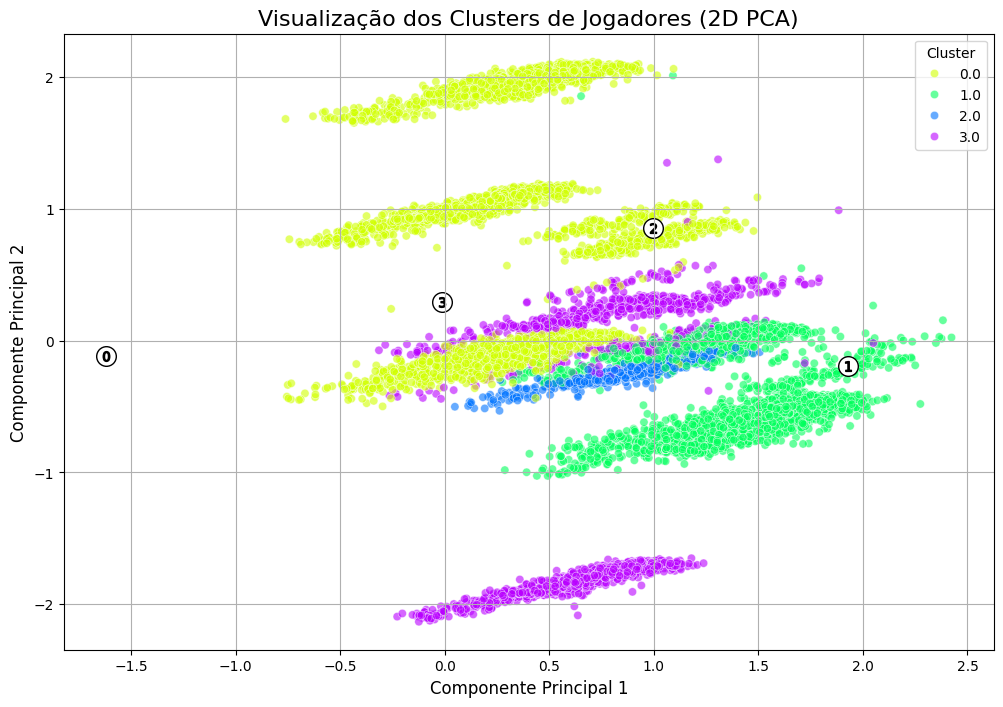

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CORREÇÃO: Garanta que df_para_cluster seja um DataFrame ---
# Supondo que 'componentes_principais_final' é o array NumPy que saiu do seu PCA
# e 'n_componentes_final' é o número de componentes que você usou (ex: 41 ou 17).

df_para_cluster = pd.DataFrame(data=componentes_principais_final,
                               columns=[f'Componente_{i}' for i in range(1, n_componentes_final + 1)])


# --- Visualização dos Clusters (usando o DataFrame corrigido) ---

plt.figure(figsize=(12, 8))

# O código de plotagem agora funcionará, pois df_para_cluster é um DataFrame.
# Usaremos os nomes das colunas para mais clareza.
sns.scatterplot(
    x=df_para_cluster['Componente_1'],
    y=df_para_cluster['Componente_2'],
    hue=df_completo['Cluster'], # Usando o df_completo que tem os dados limpos
    palette=sns.color_palette("hsv", n_colors=4),
    legend="full",
    alpha=0.6
)

# Adicionando os centróides (o centro de cada cluster) ao gráfico
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='o',
    c="white",
    alpha=1,
    s=200,
    edgecolor='k'
)

for i, c in enumerate(centroids):
    plt.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')

plt.title('Visualização dos Clusters de Jogadores (2D PCA)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **5. Análises gráficas dos clusters**

### 5.1 Mapa de calor

O mapa de calor é uma ótima maneira de comparar os perfis dos 4 clusters de forma visual e rápida. As cores nos ajudarão a identificar facilmente quais características (atributos) são mais fortes ou mais fracas em cada grupo de jogadores.

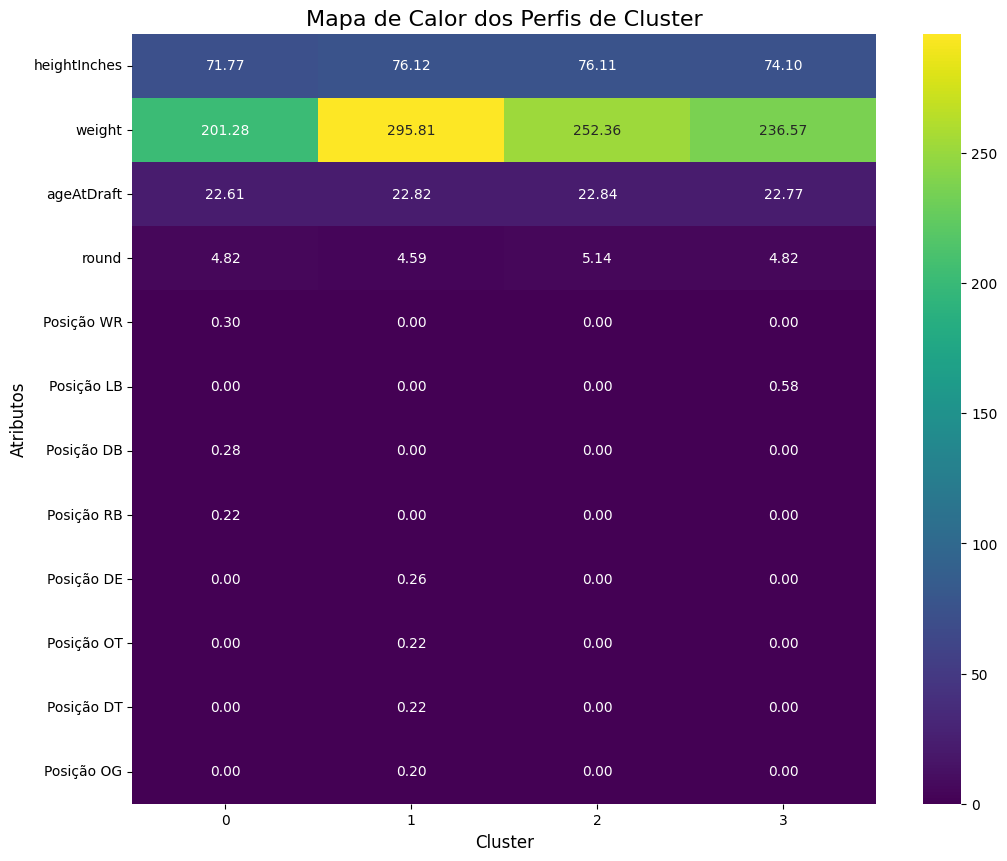

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_completo' é o DataFrame limpo com a coluna 'Cluster'.

# --- Etapa 1: Preparar os dados para o heatmap ---

# Primeiro, fazemos o One-Hot Encoding da coluna de posição para transformá-la em números
df_heatmap_source = pd.get_dummies(df_completo, columns=['position'])

# Agora, calculamos a média de todos os atributos para cada cluster.
# Para colunas numéricas, será a média (ex: peso médio).
# Para as colunas de posição (que agora são 0s e 1s), a média será a porcentagem de ocorrência.
df_heatmap_data = df_heatmap_source.groupby('Cluster').mean()


# --- Etapa 2: Selecionar os atributos mais relevantes para visualizar ---

# Pegamos as 8 posições mais comuns para não poluir o gráfico
top_positions = df_completo['position'].value_counts().nlargest(8).index
colunas_posicao = [f'position_{pos}' for pos in top_positions]

# Selecionamos os atributos físicos e as posições mais comuns
atributos_para_heatmap = ['heightInches', 'weight', 'ageAtDraft', 'round'] + colunas_posicao
df_heatmap_final = df_heatmap_data[atributos_para_heatmap]

# Renomeamos as colunas de posição para ficarem mais legíveis
df_heatmap_final = df_heatmap_final.rename(columns=lambda x: x.replace('position_', 'Posição '))

# --- Etapa 3: Gerar o Mapa de Calor ---

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_heatmap_final.transpose(), # Transpomos para que os atributos fiquem no eixo Y
    annot=True,       # Mostra os números dentro de cada célula
    cmap='viridis',   # Paleta de cores
    fmt=".2f"         # Formata os números para duas casas decimais
)

plt.title('Mapa de Calor dos Perfis de Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Atributos', fontsize=12)
plt.show()

### 5.2 Mapa de radar

Este tipo de gráfico é perfeito para comparar os 4 perfis de cluster ao mesmo tempo, mostrando seus "pontos fortes" em diferentes atributos. Ele nos dará uma visão clara e comparativa das características de cada grupo.

In [23]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Supondo que 'df_perfis_clusters_final' é o DataFrame com os perfis de cada cluster.

# --- Etapa 1: Preparar os dados para o Diagrama de Radar ---

# CORREÇÃO: Usando os nomes originais das colunas
colunas_numericas_originais = ['heightInches', 'weight', 'ageAtDraft', 'round']
df_radar = df_perfis_clusters_final[colunas_numericas_originais].copy()

# O Diagrama de Radar funciona melhor quando os dados estão na mesma escala.
# Vamos normalizar os valores entre 0 e 1.
scaler = MinMaxScaler()
df_radar_scaled = pd.DataFrame(scaler.fit_transform(df_radar), columns=df_radar.columns)

# Adicionamos os nomes dos clusters de volta
df_radar_scaled['Cluster'] = df_perfis_clusters_final.index


# --- Etapa 2: Gerar o Diagrama de Radar ---

fig = go.Figure()

# Lista de cores para cada cluster
cores = ['lightcoral', 'skyblue', 'gold', 'limegreen']

for i, row in df_radar_scaled.iterrows():
    cluster_num = row['Cluster']
    # A última coluna é o nome do cluster, então pegamos todas menos ela para os valores
    valores = row.drop('Cluster').tolist()
    # Para fechar o radar, repetimos o primeiro valor no final
    valores.append(valores[0])

    atributos = df_radar.columns.tolist()
    atributos.append(atributos[0]) # Repete o primeiro atributo para fechar o laço

    fig.add_trace(go.Scatterpolar(
        r=valores,
        theta=atributos,
        fill='toself',
        name=f'Cluster {cluster_num}',
        line=dict(color=cores[i])
    ))

fig.update_layout(
  title='Diagrama de Radar Comparativo dos Perfis de Cluster',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
  height=700
)

fig.show()

### 5.3 Gráficos de Barras Comparativos

Agora vamos comparar de forma mais direta os atributos mais importantes entre os clusters.

/tmp/ipython-input-3626961445.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3626961445.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




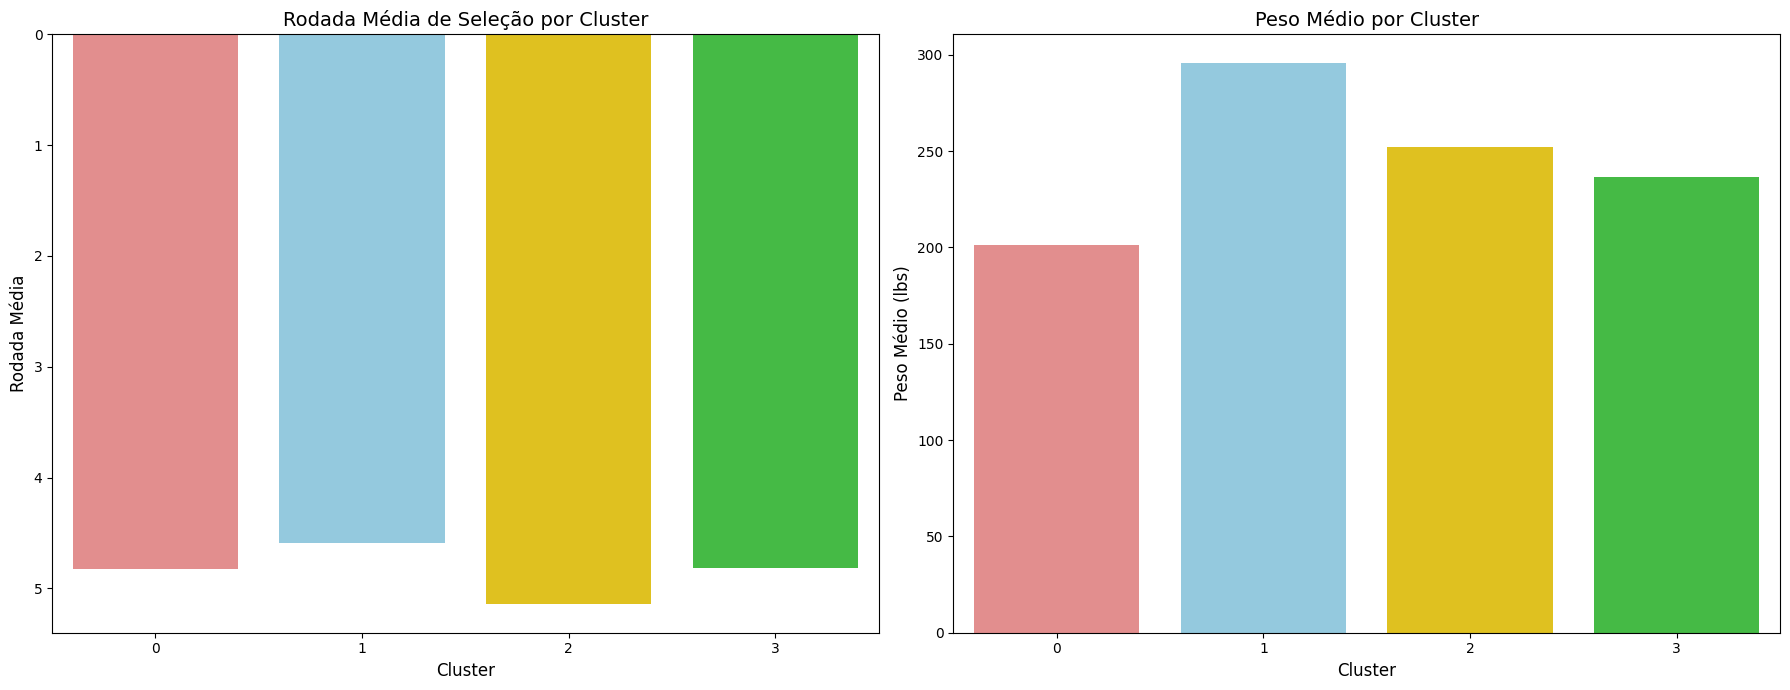

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_perfis_clusters_final' ainda está disponível.

# --- Gráficos de Barras ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
cores = ['lightcoral', 'skyblue', 'gold', 'limegreen']

# Gráfico 1: Rodada Média por Cluster
# CORREÇÃO: Usando o nome original da coluna 'round'
sns.barplot(x=df_perfis_clusters_final.index, y='round', data=df_perfis_clusters_final, ax=axes[0], palette=cores)
axes[0].set_title('Rodada Média de Seleção por Cluster', fontsize=14)
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Rodada Média', fontsize=12)
axes[0].invert_yaxis()


# Gráfico 2: Peso Médio por Cluster
# CORREÇÃO: Usando o nome original da coluna 'weight'
sns.barplot(x=df_perfis_clusters_final.index, y='weight', data=df_perfis_clusters_final, ax=axes[1], palette=cores)
axes[1].set_title('Peso Médio por Cluster', fontsize=14)
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Peso Médio (lbs)', fontsize=12)


plt.tight_layout()
plt.show()

### 5.4 Distribuição de Peso Dentro de Cada Cluster (Histogramas)

--- Gerando Histogramas de Distribuição de Peso por Cluster ---


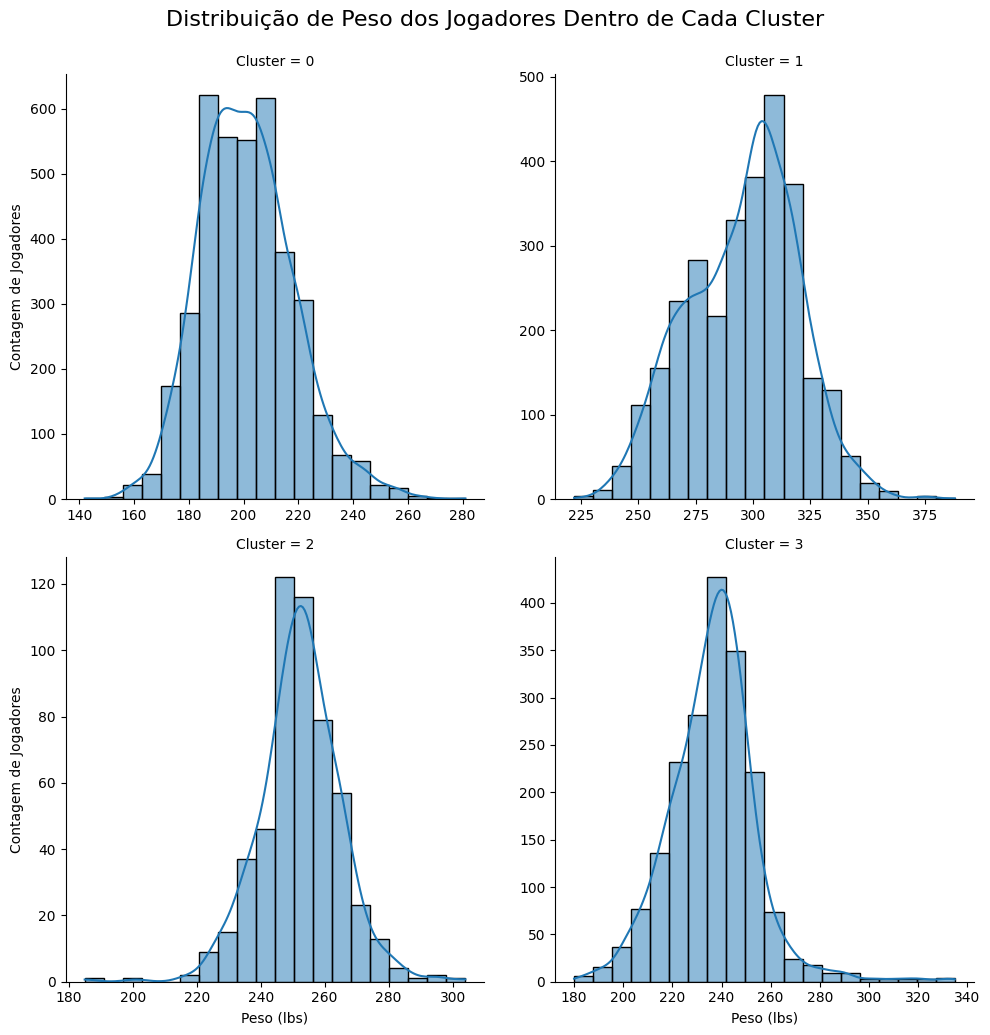

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df_completo' é o seu DataFrame com os dados limpos e a coluna 'Cluster'.

print("--- Gerando Histogramas de Distribuição de Peso por Cluster ---")

# Usamos o FacetGrid para criar um gráfico para cada cluster
g = sns.FacetGrid(df_completo, col="Cluster", col_wrap=2, height=5, sharex=False, sharey=False)
g.map(sns.histplot, 'weight', bins=20, kde=True)

g.fig.suptitle('Distribuição de Peso dos Jogadores Dentro de Cada Cluster', y=1.03, fontsize=16)
g.set_axis_labels("Peso (lbs)", "Contagem de Jogadores")
plt.show()

### 5.5 Composição de Posições por Cluster (Gráfico de Barras Empilhadas)



--- Gerando Gráfico de Composição de Posições por Cluster (Paleta 'Paired') ---


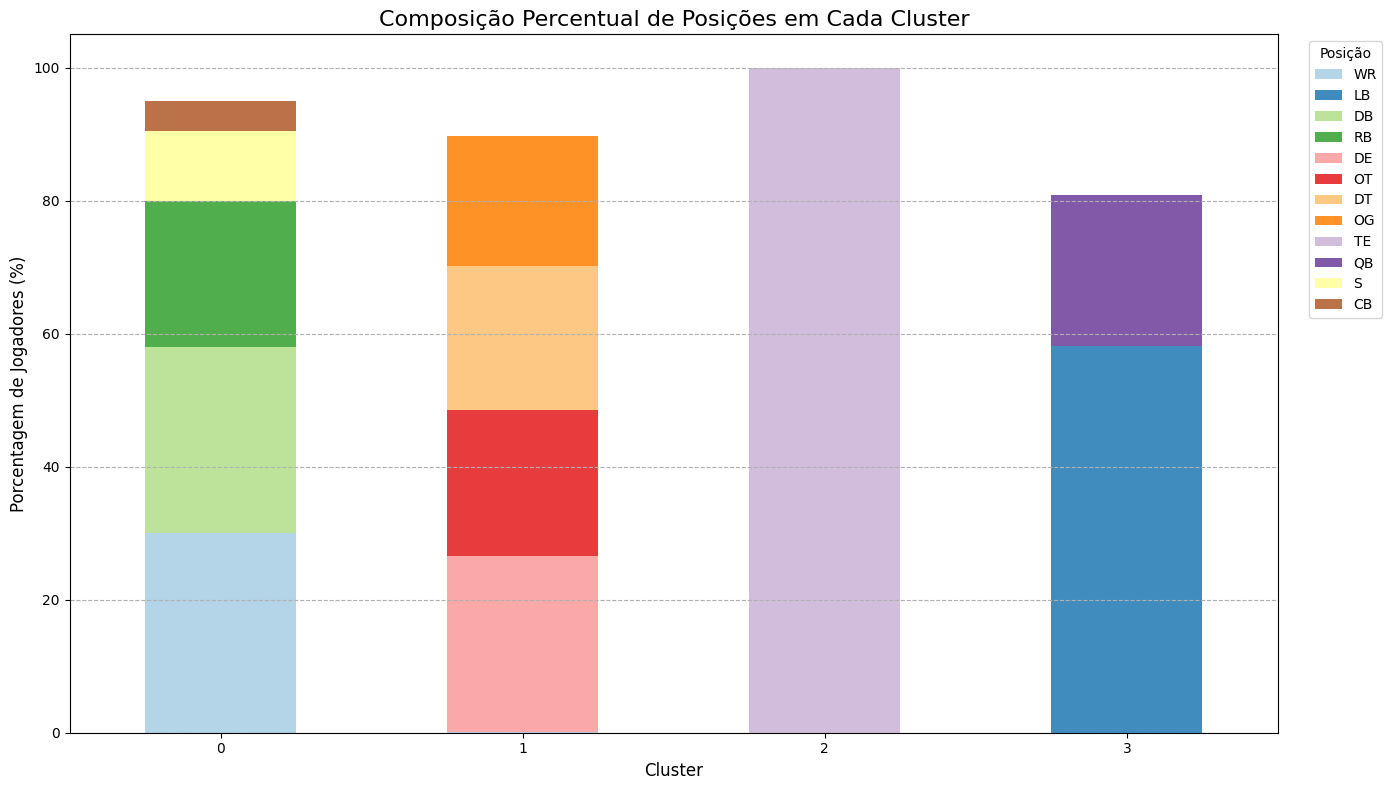

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df_completo' está disponível.

print("\n" + "="*50 + "\n")
print("--- Gerando Gráfico de Composição de Posições por Cluster (Paleta 'Paired') ---")

# Cria uma tabela de contingência com a contagem de posições por cluster
cross_tab = pd.crosstab(df_completo['Cluster'], df_completo['position'])

# Normaliza os dados para obter a porcentagem (de 0 a 100)
cross_tab_perc = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Seleciona as 12 posições mais comuns para o gráfico
top_positions = df_completo['position'].value_counts().nlargest(12).index
cross_tab_perc_top = cross_tab_perc[top_positions]

# Gera o gráfico de barras empilhadas com a paleta de cores 'Paired'
cross_tab_perc_top.plot(kind='bar', stacked=True, figsize=(14, 8),
                        colormap='Paired',
                        alpha=0.85)

plt.title('Composição Percentual de Posições em Cada Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Porcentagem de Jogadores (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Posição', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--') # <-- LINHA CORRIGIDA
plt.tight_layout()
plt.show()

## **6. Análise Descritiva dos Clusters**

*   **Cluster 0:** Este cluster tem a menor altura e peso médios. A posição mais frequente é WR (Wide Receiver), seguida por DB (Defensive Back) e RB (Running Back). A rodada média de seleção é por volta da 5ª rodada, com a moda sendo a 7ª rodada, indicando que jogadores deste cluster são frequentemente selecionados em rodadas intermediárias a tardias. Este cluster parece agrupar jogadores de posições mais ágeis e tipicamente mais leves.

*   **Cluster 1:** Este cluster se destaca pela maior altura e maior peso. A posição mais frequente é DE (Defensive End), com alta frequência também de OT (Offensive Tackle), DT (Defensive Tackle) e OG (Offensive Guard). A rodada média é próxima da 4ª rodada. Este cluster parece representar jogadores de linha ofensiva e defensiva, que geralmente são maiores e mais pesados.

*   **Cluster 2:** Este cluster é dominado por jogadores da posição TE (Tight End). Eles possuem a segunda maior altura (ficando atrás dos jogares do cluster 1) e peso médios intermediários em comparação com os outros clusters, sendo mais altos e pesados que os do Cluster 0, mas menos pesados que os do Cluster 1. A rodada média é por volta da 5ª rodada. Este cluster claramente agrupa os jogadores de Tight End.

*   **Cluster 3:** Este cluster apresenta altura e peso médios intermediários, sendo mais pesados que o Cluster 0 e mais leves que o Cluster 1. A posição mais frequente é LB (Linebacker), seguida por QB (Quarterback) e FB (Fullback). A rodada média de seleção é por volta da 5ª rodada. Este cluster parece agrupar jogadores de posições que exigem uma combinação de tamanho, força e agilidade, como Linebackers e Quarterbacks.

In [28]:
# Análise Descritiva por Cluster
print("\n--- Análise Descritiva por Cluster ---")
display(df_completo.groupby('Cluster').agg({
    'heightInches': ['mean', 'std', 'min', 'max'],
    'weight': ['mean', 'std', 'min', 'max'],
    'ageAtDraft': ['mean', 'std', 'min', 'max'],
    'round': ['mean', 'std', 'min', 'max', lambda x: x.mode()[0]], # Adiciona a moda para a rodada
    'position': lambda x: x.mode()[0] # Adiciona a posição mais frequente (moda)
}).rename(columns={'<lambda_0>': 'most_frequent_round', '<lambda_1>': 'most_frequent_position'}))

print("\n" + "="*50 + "\n")
print("--- Distribuição de Posições por Cluster (Top 5) ---")
# Para cada cluster, mostre as 5 posições mais frequentes
for i in sorted(df_completo['Cluster'].unique()):
    print(f"\nCluster {i}:")
    display(df_completo[df_completo['Cluster'] == i]['position'].value_counts().head())


--- Análise Descritiva por Cluster ---


heightInches                            weight                    \
                mean       std   min   max        mean        std    min   
Cluster                                                                    
0          71.768792  1.989196  65.0  78.0  201.279938  17.260045  142.0   
1          76.117390  1.610659  68.0  81.0  295.813993  23.885072  222.0   
2          76.107750  1.420133  69.0  80.0  252.359168  12.728946  185.0   
3          74.098810  1.639024  68.0  80.0  236.568546  17.933541  180.0   

               ageAtDraft                                     round            \
           max       mean       std        min        max      mean       std   
Cluster                                                                         
0        281.0  22.609828  0.821975  19.523288  27.419178  4.823224  2.694613   
1        388.0  22.823190  0.835897  19.890411  28.487671  4.591995  2.660089   
2        304.0  22.836600  0.845988  20.471233  26.802740  5.143667  2.565462   
3        335.0  22.767149  0.821797  20.005479  28.742466  4.818934  2.717232   

                                       position  
         min   max most_frequent_round <lambda>  
Cluster                                          
0        1.0  12.0                 7.0       WR  
1        1.0  12.0                 7.0       DE  
2        1.0  12.0                 7.0       TE  
3        1.0  12.0                 7.0       LB



--- Distribuição de Posições por Cluster (Top 5) ---

Cluster 0:


,count
position,
WR,1158
DB,1079
RB,846
S,409
CB,175



Cluster 1:


,count
position,
DE,786
OT,655
DT,642
OG,580
OC,138



Cluster 2:


,count
position,
TE,529



Cluster 3:


,count
position,
LB,1124
QB,438
FB,133
OLB,85
NT,60
